In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath=r"C:\Users\ONE\OneDrive - FFUNIZG\Radna površina\Faks\CogSci\DataScience\data\cle_bb.csv"
data=pd.read_csv(filepath)

In [4]:
data.head()

,Age,Sex,CP,RestBP,Chol,FBS,RestECG,HeartBeat,Exang,OldPeak,Slope,CA,Thal,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,2.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,3.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,1.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,1.0,0


In [5]:
data_num = ["Age", "RestBP", "Chol", "HeartBeat", "OldPeak"]

# Classification Models

In [6]:
X = data.drop("Target", axis=1)
y = data["Target"]

In [7]:
split_no = 10

In [8]:
kfold=KFold(n_splits=split_no, shuffle=True, random_state=0)

## Decision Tree Classifier

In [9]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

In [10]:
conf_matrix_sum_tree = None
precision_list_tree = []
recall_list_tree = []
accuracy_list_tree = []

for train_tree_index, test_tree_index in kfold.split(X):
    X_train_tree, X_test_tree = X.iloc[train_tree_index], X.iloc[test_tree_index]
    y_train_tree, y_test_tree = y.iloc[train_tree_index], y.iloc[test_tree_index]

    tree.fit(X_train_tree, y_train_tree)
    y_pred_tree = tree.predict(X_test_tree)

    conf_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)

    if conf_matrix_sum_tree is None:
        conf_matrix_sum_tree = conf_matrix_tree
    else:
        conf_matrix_sum_tree += conf_matrix_tree
    
    precision_list_tree.append(precision_score(y_test_tree, y_pred_tree))
    recall_list_tree.append(recall_score(y_test_tree, y_pred_tree))
    accuracy_list_tree.append(accuracy_score(y_test_tree, y_pred_tree))

In [11]:
avg_accuracy_tree = np.mean(accuracy_list_tree) 
print(f"Decision Tree Average Accuracy: {avg_accuracy_tree*100:.2f}%")

Decision Tree Average Accuracy: 74.26%


In [12]:
avg_precision_tree = np.mean(precision_list_tree)
avg_recall_tree = np.mean(recall_list_tree)
print(f"Average decision tree precision is {avg_precision_tree*100:.2f}% and average recall is {avg_recall_tree*100:.2f}%.")

Average decision tree precision is 72.79% and average recall is 69.68%.


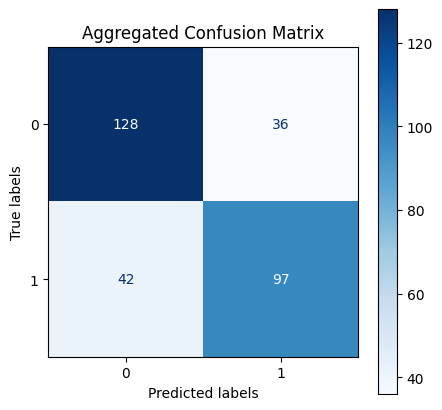

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_sum_tree).plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Aggregated Confusion Matrix')
plt.show()

## Naive Bayes Classifier

In [14]:
gnb = GaussianNB()

In [15]:
conf_matrix_sum_gnb = None
precision_list_gnb = []
recall_list_gnb = []
accuracy_list_gnb = []

for train_gnb_index, test_gnb_index in kfold.split(X):
    X_train_gnb, X_test_gnb = X.iloc[train_gnb_index], X.iloc[test_gnb_index]
    y_train_gnb, y_test_gnb = y.iloc[train_gnb_index], y.iloc[test_gnb_index]

    gnb.fit(X_train_gnb, y_train_gnb)
    y_pred_gnb = gnb.predict(X_test_gnb)

    conf_matrix_gnb = confusion_matrix(y_test_gnb, y_pred_gnb)

    if conf_matrix_sum_gnb is None:
        conf_matrix_sum_gnb = conf_matrix_gnb
    else:
        conf_matrix_sum_gnb += conf_matrix_gnb
    
    precision_list_gnb.append(precision_score(y_test_gnb, y_pred_gnb))
    recall_list_gnb.append(recall_score(y_test_gnb, y_pred_gnb))
    accuracy_list_gnb.append(accuracy_score(y_test_gnb, y_pred_gnb))

In [16]:
avg_accuracy_gnb = np.mean(accuracy_list_gnb) 
print(f"Random Forest Average Accuracy: {avg_accuracy_gnb*100:.2f}%")

Random Forest Average Accuracy: 84.51%


In [17]:
avg_precision_gnb = np.mean(precision_list_gnb)
avg_recall_gnb = np.mean(recall_list_gnb)
print(f"Average decision tree precision is {avg_precision_gnb*100:.2f}% and average recall is {avg_recall_gnb*100:.2f}%.")

Average decision tree precision is 84.24% and average recall is 80.25%.


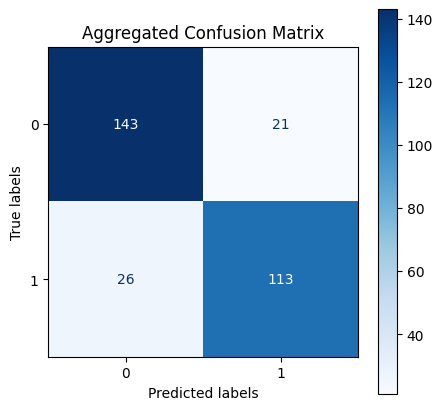

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_sum_gnb).plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Aggregated Confusion Matrix')
plt.show()

## Random Forest Classifier

In [19]:
rf = RandomForestClassifier(max_depth=5, random_state=0)

In [20]:
conf_matrix_sum_rf = None
precision_list_rf = []
recall_list_rf = []
accuracy_list_rf = []

for train_rf_index, test_rf_index in kfold.split(X):
    X_train_rf, X_test_rf = X.iloc[train_rf_index], X.iloc[test_rf_index]
    y_train_rf, y_test_rf = y.iloc[train_rf_index], y.iloc[test_rf_index]

    rf.fit(X_train_rf, y_train_rf)
    y_pred_rf = rf.predict(X_test_rf)

    conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

    if conf_matrix_sum_rf is None:
        conf_matrix_sum_rf = conf_matrix_rf
    else:
        conf_matrix_sum_rf += conf_matrix_rf
    
    precision_list_rf.append(precision_score(y_test_rf, y_pred_rf))
    recall_list_rf.append(recall_score(y_test_rf, y_pred_rf))
    accuracy_list_rf.append(accuracy_score(y_test_rf, y_pred_rf))

In [21]:
avg_accuracy_rf = np.mean(accuracy_list_rf) 
print(f"Random Forest Average Accuracy: {avg_accuracy_rf*100:.2f}%")

Random Forest Average Accuracy: 81.22%


In [22]:
avg_precision_rf = np.mean(precision_list_rf)
avg_recall_rf = np.mean(recall_list_rf)
print(f"Average decision tree precision is {avg_precision_rf*100:.2f}% and average recall is {avg_recall_rf*100:.2f}%.")

Average decision tree precision is 82.70% and average recall is 74.48%.


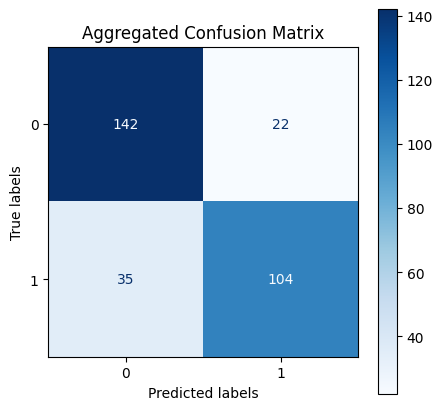

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_sum_rf).plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Aggregated Confusion Matrix')
plt.show()

### Numerical Features Standardization

In [24]:
scaler = StandardScaler()

In [25]:
data_tmp = data.copy()

In [26]:
data_tmp[data_num] = scaler.fit_transform(data_tmp[data_num])

In [27]:
data_tmp.head()

,Age,Sex,CP,RestBP,Chol,FBS,RestECG,HeartBeat,Exang,OldPeak,Slope,CA,Thal,Target
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,3.0,0.0,2.0,0
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,2.0,3.0,1.0,1
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,2.0,2.0,3.0,1
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,3.0,0.0,1.0,0
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,1.0,0.0,1.0,0


In [28]:
X_tmp = data_tmp.drop("Target", axis=1)
y_tmp = data_tmp["Target"]

## Logistic Regression

In [29]:
logreg = LogisticRegression(random_state=0)

In [30]:
conf_matrix_sum_logreg = None
precision_list_logreg = []
recall_list_logreg = []
accuracy_list_logreg = []

for train_logreg_index, test_logreg_index in kfold.split(X):
    X_train_logreg, X_test_logreg = X_tmp.iloc[train_logreg_index], X_tmp.iloc[test_logreg_index]
    y_train_logreg, y_test_logreg = y_tmp.iloc[train_logreg_index], y_tmp.iloc[test_logreg_index]

    logreg.fit(X_train_logreg, y_train_logreg)
    y_pred_logreg = logreg.predict(X_test_logreg)

    conf_matrix_logreg = confusion_matrix(y_test_logreg, y_pred_logreg)

    if conf_matrix_sum_logreg is None:
        conf_matrix_sum_logreg = conf_matrix_logreg
    else:
        conf_matrix_sum_logreg += conf_matrix_logreg
    
    precision_list_logreg.append(precision_score(y_test_logreg, y_pred_logreg))
    recall_list_logreg.append(recall_score(y_test_logreg, y_pred_logreg))
    accuracy_list_logreg.append(accuracy_score(y_test_logreg, y_pred_logreg))

In [31]:
avg_accuracy_logreg = np.mean(accuracy_list_logreg) 
print(f"Logistic Regression Average Accuracy: {avg_accuracy_logreg*100:.2f}%")

Logistic Regression Average Accuracy: 83.51%


In [32]:
avg_precision_logreg = np.mean(precision_list_logreg)
avg_recall_logreg = np.mean(recall_list_logreg)
print(f"Average decision tree precision is {avg_precision_logreg*100:.2f}% and average recall is {avg_recall_logreg*100:.2f}%.")

Average decision tree precision is 85.39% and average recall is 77.81%.


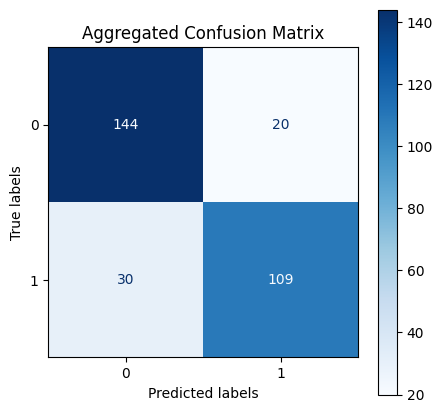

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_sum_logreg).plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Aggregated Confusion Matrix')
plt.show()

## SVM

In [34]:
svm = SVC()

In [35]:
conf_matrix_sum_svm = None
precision_list_svm = []
recall_list_svm = []
accuracy_list_svm = []

for train_svm_index, test_svm_index in kfold.split(X):
    X_train_svm, X_test_svm = X_tmp.iloc[train_svm_index], X_tmp.iloc[test_svm_index]
    y_train_svm, y_test_svm = y_tmp.iloc[train_svm_index], y_tmp.iloc[test_svm_index]

    svm.fit(X_train_svm, y_train_svm)
    y_pred_svm = svm.predict(X_test_svm)

    conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)

    if conf_matrix_sum_svm is None:
        conf_matrix_sum_svm = conf_matrix_svm
    else:
        conf_matrix_sum_svm += conf_matrix_svm
    
    precision_list_svm.append(precision_score(y_test_svm, y_pred_svm))
    recall_list_svm.append(recall_score(y_test_svm, y_pred_svm))
    accuracy_list_svm.append(accuracy_score(y_test_svm, y_pred_svm))

In [36]:
avg_accuracy_svm = np.mean(accuracy_list_svm) 
print(f"Decision Tree Average Accuracy: {avg_accuracy_svm*100:.2f}%")

Decision Tree Average Accuracy: 82.84%


In [37]:
avg_precision_svm = np.mean(precision_list_svm)
avg_recall_svm = np.mean(recall_list_svm)

print(f"Average decision tree precision is {avg_precision_svm*100:.2f}% and average recall is {avg_recall_svm*100:.2f}%.")

Average decision tree precision is 84.81% and average recall is 76.56%.


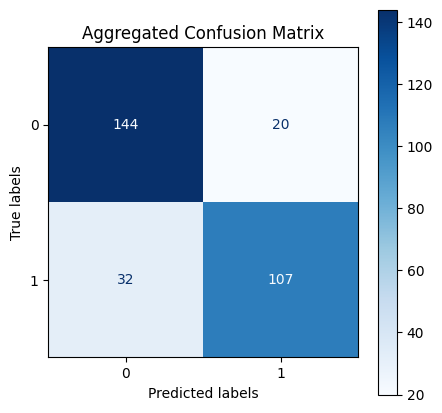

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_sum_svm).plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Aggregated Confusion Matrix')
plt.show()

# Model Comparison

In [39]:
model_accuracy = {
    "Decision Tree": avg_accuracy_tree,
    "Naive Bayes": avg_accuracy_gnb,
    "Random Forest": avg_accuracy_rf,
    "Logistic Regression": avg_accuracy_logreg,
    "SVM": avg_accuracy_svm   
}

In [40]:
series_accuracy = pd.Series(model_accuracy)

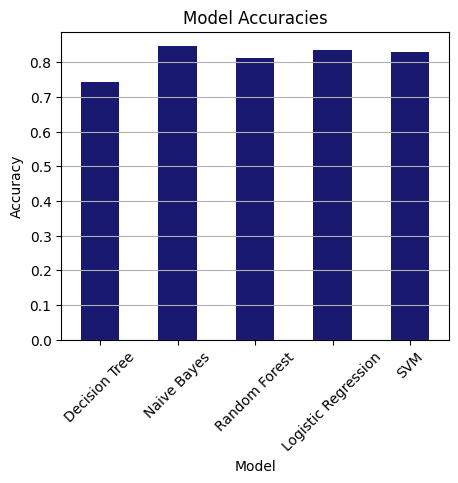

In [41]:
series_accuracy.plot(kind='bar', figsize=(5, 4), color='midnightblue')

plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [42]:
model_performance = {
    "Decision Tree": {"avg_precision": avg_precision_tree, "avg_recall": avg_recall_tree},
    "Naive Bayes": {"avg_precision": avg_precision_gnb, "avg_recall": avg_recall_gnb},
    "Random Forest": {"avg_precision": avg_precision_rf, "avg_recall": avg_recall_rf},
    "Logistic Regression": {"avg_precision": avg_precision_logreg, "avg_recall": avg_recall_logreg},
    "SVM": {"avg_precision": avg_precision_svm, "avg_recall": avg_recall_svm},   
}

In [43]:
df_perform = pd.DataFrame(model_performance)

In [44]:
df_perform = df_perform.transpose()

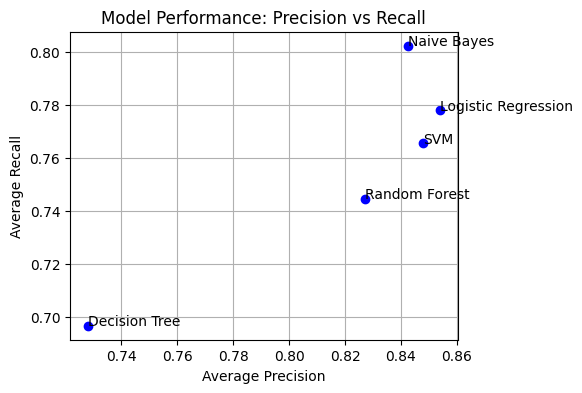

In [45]:
plt.figure(figsize=(5, 4))
plt.scatter(df_perform['avg_precision'], df_perform['avg_recall'], color='blue')
plt.title('Model Performance: Precision vs Recall')
plt.xlabel('Average Precision')
plt.ylabel('Average Recall')
for i, txt in enumerate(df_perform.index):
    plt.annotate(txt, (df_perform['avg_precision'][i], df_perform['avg_recall'][i]))
plt.grid(True)
plt.show()

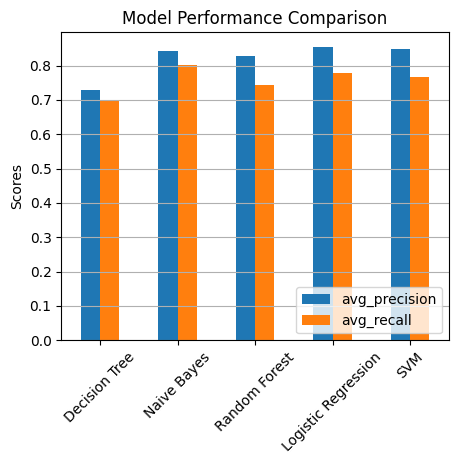

In [46]:
df_perform.plot(kind='bar', figsize=(5, 4))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc="lower right")
plt.show()